In [1]:
# ignore this
%load_ext music21.ipython21

User's Guide, Chapter 25: Post-Tonal Tools (1)
==============================================

The music21 toolkit features many tools for analyzing and creating music within
a post-tonal context. A :class:`~music21.chord.Chord` can be identified as a
Forte class, a list of pitch classes can be used to create a 12-tone matrix,
and many other analytical tools are available. 

This overview will illustrate key features of music21's post tonal tools. For
complete documentation on post-tonal tools, see the many methods in
:class:`~music21.chord.Chord` as well as the objects in :ref:`moduleSerial`,
such as :class:`~music21.serial.TwelveToneMatrix` and
:class:`~music21.serial.TwelveToneRow`.

## Pitches as Pitch Classes

Any music21 :class:`~music21.pitch.Pitch`, or a  :class:`~music21.note.Note`
containing Pitch, can be expressed as pitch class integers using the
:meth:`pitchClass <music21.pitch.Pitch.pitchClass>` and
:meth:`pitchClassString <music21.pitch.Pitch.pitchClassString>` properties. 

In the following example, the :func:`~music21.corpus.parse` function is
used to create a :class:`~music21.stream.Score` object. The
:meth:`id <music21.base.Music21Object.id>` attribute of each contained
:class:`~music21.stream.Part` is presented in a list. 

In [2]:
from music21 import *
aScore = corpus.parse('beethoven/opus59no2', 3)
[e.id for e in aScore.parts]

['Violin I.', 'Violin II.', 'Viola.', 'Violoncello.']

We can view the fourth and fifth measures of the violin Part by obtaining the
Part from the Stream with :meth:`~music21.stream.Stream.getElementById` method.
Next, we can extract the desired measures with the
:meth:`~music21.stream.Stream.measures` method. Calling the
:meth:`~music21.base.Music21Object.show` method will, assuming correct setup of your
environment, open a display of the extracted measures.

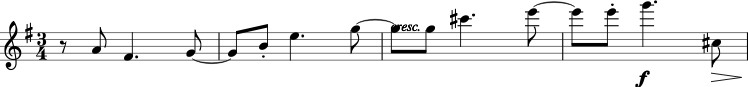

In [3]:
vlnPart = aScore.getElementById('Violin I.')
mRange = vlnPart.measures(4,7)
mRange.show()

If we want to gather all :class:`~music21.pitch.Pitch` objects from this
measure range, we can use the :meth:`pitches <music21.stream.Stream.pitches>` property.
This returns a list of all Pitch objects. All pitch objects have
:meth:`pitchClass <music21.pitch.Pitch.pitchClass>` and
:meth:`pitchClassString <music21.pitch.Pitch.pitchClassString>` properties, providing either integer
or string representations, respectively.

In [4]:
[str(p) for p in mRange.pitches]

['A4',
 'F#4',
 'G4',
 'G4',
 'B4',
 'E5',
 'G5',
 'G5',
 'G5',
 'C#6',
 'E6',
 'E6',
 'E6',
 'G6',
 'C#5']

In [5]:
[p.pitchClass for p in mRange.pitches]

[9, 6, 7, 7, 11, 4, 7, 7, 7, 1, 4, 4, 4, 7, 1]

If we want to label the notes in our measure range with the Note's pitch class
representation, we can iterate over the notes and assign the pitch class
representation to the Note's lyric.  This is a common way to annotate Note and
Chord objects in music21. The results can be displayed with the `show()` method.

Here is the image from when we were using a Beethoven Quartet as an example:

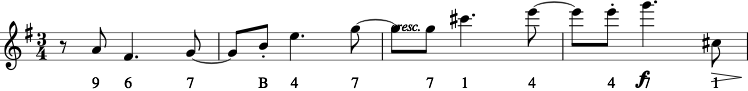

In [7]:
for n in mRange.flat.notes:
    if n.tie is None or n.tie.type == 'start':
        n.lyric = n.pitch.pitchClassString
mRange.show()

## Chords as Forte Set Classes

Any music21 Chord can be interpreted as a Forte set class. Additional, a wide
variety of analytical features, derived from the Forte set class, are available
as methods of the chord. 

For an example, lets create a sequence of generated aggregate-completing
trichords stored on a Stream. That is, we will construct chords with pitch
classes, drawing them from a list of all pitch classes. These pitches will be
supplied to a Chord object and stored on a Stream.

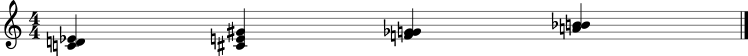

In [8]:
aStream = stream.Stream()
src = list(range(12)) # cheate a list of integers 0 through 11
src = src[2:4] + src[0:2] + src[8:9] + src[4:8] + src[9:12] # recombine
for i in range(0,12,3):
    aStream.append(chord.Chord(src[i:i+3]))
    
aStream.show()

These Chords, like all Chords in music21, can be interpreted as Forte set
classes. The Chord object offers numerous methods that retrieve data from the
set class representation of the Chord. The following is just a sampling of some
of the many relevant methods. 

In [9]:
for c in aStream: 
    print(c.orderedPitchClassesString)

<023>
<148>
<567>
<9AB>


In [10]:
for c in aStream: 
    print(c.forteClass)

3-2B
3-11A
3-1
3-1


In [11]:
for c in aStream: 
    print(c.forteClassTnI)

3-2
3-11
3-1
3-1


In [12]:
for c in aStream: 
    print(c.normalForm)

[0, 2, 3]
[0, 3, 7]
[0, 1, 2]
[0, 1, 2]


In [13]:
for c in aStream: 
    print(c.primeFormString)

<013>
<037>
<012>
<012>


In [14]:
for c in aStream: 
    print(c.intervalVector)

[1, 1, 1, 0, 0, 0]
[0, 0, 1, 1, 1, 0]
[2, 1, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0]


To annotate the Chords stored on the Stream with their Forte name, we can
iterate over the Stream and assign the Forte name to each Chord's `lyric`
attribute.

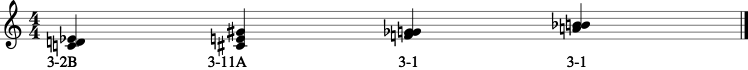

In [15]:
for c in aStream:
    c.lyric = c.forteClass
aStream.show()

We can use the `itertools.combinations` function to find all possible subsets of a chord for a given cardinality. (Hat tip to John Chittum for the hint).  Here is the `all tri-chord hexachord` which contains within it all possible three-note chords under inversion and transposition:

In [16]:
import itertools
c = chord.Chord([0, 1, 2, 4, 7, 8])
c.commonName

'all tri-chord hexachord'

Now we'll test this create a set to hold the Forte number for each trichord and see that all twelve of them are there:

In [17]:
cc = set()
for i in itertools.combinations(c.pitches, 3):
    cc.add(chord.Chord(i).forteClassNumber)
cc

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

## Creating and Processing Twelve-Tone Matrices

The music21 :ref:`moduleSerial` module provides a Stream-based representation
of a 12-Tone row, as well as the ability to view these rows as a matrix.
Additionally, numerous 12-tone rows from works are available as classes. 

For example, we can create an instance of the row from Alban Berg's *Violin
Concerto*, use the `show()` method to display its contents as text, and then
create and print a :class:`~music21.serial.TwelveToneMatrix` object. 

In [18]:
aRow = serial.getHistoricalRowByName('RowBergViolinConcerto')
aRow.show('text')

{0.0} <music21.note.Note G>
{1.0} <music21.note.Note B->
{2.0} <music21.note.Note D>
{3.0} <music21.note.Note F#>
{4.0} <music21.note.Note A>
{5.0} <music21.note.Note C>
{6.0} <music21.note.Note E>
{7.0} <music21.note.Note G#>
{8.0} <music21.note.Note B>
{9.0} <music21.note.Note C#>
{10.0} <music21.note.Note E->
{11.0} <music21.note.Note F>


In [19]:
aMatrix = aRow.matrix()
print(aMatrix)

  0  3  7  B  2  5  9  1  4  6  8  A
  9  0  4  8  B  2  6  A  1  3  5  7
  5  8  0  4  7  A  2  6  9  B  1  3
  1  4  8  0  3  6  A  2  5  7  9  B
  A  1  5  9  0  3  7  B  2  4  6  8
  7  A  2  6  9  0  4  8  B  1  3  5
  3  6  A  2  5  8  0  4  7  9  B  1
  B  2  6  A  1  4  8  0  3  5  7  9
  8  B  3  7  A  1  5  9  0  2  4  6
  6  9  1  5  8  B  3  7  A  0  2  4
  4  7  B  3  6  9  1  5  8  A  0  2
  2  5  9  1  4  7  B  3  6  8  A  0



We might divide this row into trichords, present each of those trichords as
Chords, and label the resulting pitch classes and Forte set class. As shown
above, we can set the `lyric` attribute to assign a single line of text. If we
need to assign multiple lines of text, the Note and Chord method
:meth:`~music21.note.GeneralNote.addLyric` can be used to add successive lines.

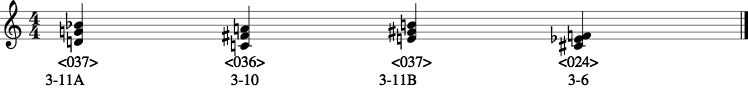

In [20]:
bStream = stream.Stream()
for i in range(0,12,3):
    c = chord.Chord(aRow[i:i+3])
    c.addLyric(c.primeFormString)
    c.addLyric(c.forteClass)
    bStream.append(c)
bStream.show()